<a href="https://colab.research.google.com/github/gbiamgaurav/ml_basics_concepts-/blob/main/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
url = "https://raw.githubusercontent.com/amankharwal/Website-data/master/payment_fraud.csv"

In [2]:
### Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
### Get the data 

df = pd.read_csv(url)
df.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,paypal,28.204861,0
1,725,1,4.742303,storecredit,0.000000,0
2,845,1,4.921318,creditcard,0.000000,0
3,503,1,4.886641,creditcard,0.000000,0
4,2000,1,5.040929,creditcard,0.000000,0


In [4]:
df.columns

Index(['accountAgeDays', 'numItems', 'localTime', 'paymentMethod',
       'paymentMethodAgeDays', 'label'],
      dtype='object')

In [5]:
df.label.value_counts()

0    38661
1      560
Name: label, dtype: int64

In [6]:
df.dtypes

accountAgeDays            int64
numItems                  int64
localTime               float64
paymentMethod            object
paymentMethodAgeDays    float64
label                     int64
dtype: object

In [7]:
### convert the categorical columns into numerical columns

cat_cols = df.select_dtypes(include=['object'])

In [8]:
cat_cols

,paymentMethod
0,paypal
1,storecredit
2,creditcard
3,creditcard
4,creditcard
...,...
39216,creditcard
39217,creditcard
39218,creditcard
39219,creditcard


In [9]:
cat_cols.value_counts()

paymentMethod
creditcard       28004
paypal            9303
storecredit       1914
dtype: int64

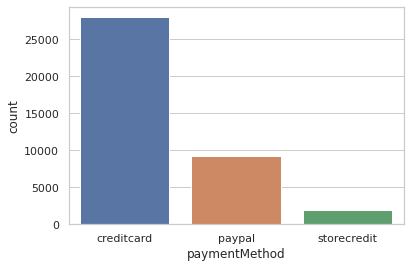

In [10]:
sns.set(style='whitegrid')

sns.countplot(x = 'paymentMethod',
              data = df,
              order = df['paymentMethod'].value_counts().index)
plt.show();

In [11]:
### Converting Categorical into Numerical columns

df['paymentMethod'] = pd.factorize(df.paymentMethod)[0]

In [12]:
df.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,0,28.204861,0
1,725,1,4.742303,1,0.000000,0
2,845,1,4.921318,2,0.000000,0
3,503,1,4.886641,2,0.000000,0
4,2000,1,5.040929,2,0.000000,0


In [13]:
df.dtypes

accountAgeDays            int64
numItems                  int64
localTime               float64
paymentMethod             int64
paymentMethodAgeDays    float64
label                     int64
dtype: object

In [14]:
corr_data = pd.DataFrame(df.corr())

In [15]:
corr_data.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
accountAgeDays,1.000000,-0.037562,-0.012600,0.004047,0.330909,-0.128098
numItems,-0.037562,1.000000,-0.042563,0.004762,0.031683,0.038116
localTime,-0.012600,-0.042563,1.000000,0.001568,-0.033076,-0.059505
paymentMethod,0.004047,0.004762,0.001568,1.000000,0.001731,0.003533
paymentMethodAgeDays,0.330909,0.031683,-0.033076,0.001731,1.000000,-0.052047


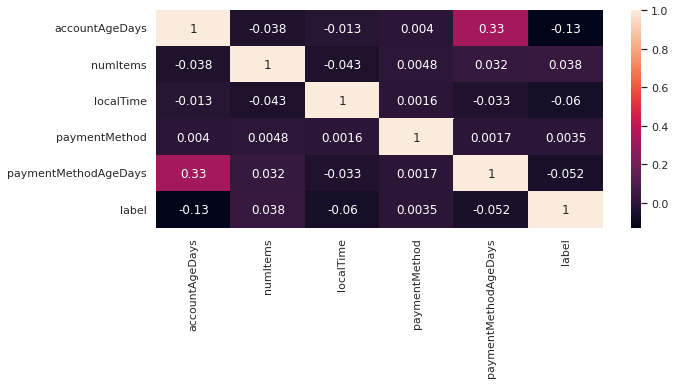

In [16]:
plt.figure(figsize=(10, 4))

sns.heatmap(corr_data, annot=True);

In [17]:
df.isnull().sum()

accountAgeDays          0
numItems                0
localTime               0
paymentMethod           0
paymentMethodAgeDays    0
label                   0
dtype: int64

In [18]:
### Split the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(df.drop('label', axis=1), df['label'], test_size=0.2, random_state=0)

In [19]:
print("Shape of train data: ", X_train.shape)
print("Shape of test data: ", X_test.shape)

Shape of train data:  (31376, 5)
Shape of test data:  (7845, 5)


#### Since `label` is our target column and a binary classification model we will use the Logistic Regression algorithm. 

In [20]:
### Import the algorithm 

from sklearn.linear_model import LogisticRegression

### Import Evalutaion metrics

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [21]:
log_reg = LogisticRegression()

In [22]:
### fit the model

log_reg.fit(X_train, y_train)

LogisticRegression()

In [23]:
### Make Predictions

y_pred = log_reg.predict(X_test)

In [24]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
print(accuracy_score(y_pred, y_test))

1.0


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7738
           1       1.00      1.00      1.00       107

    accuracy                           1.00      7845
   macro avg       1.00      1.00      1.00      7845
weighted avg       1.00      1.00      1.00      7845



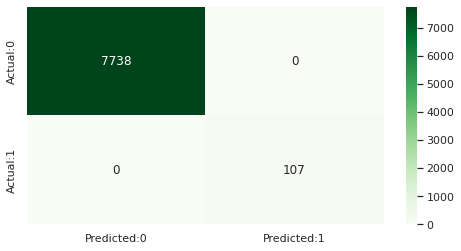

In [27]:
### Create the confusion_matrix

cm = confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data=cm, columns=["Predicted:0", "Predicted:1"], index=["Actual:0", "Actual:1"])
plt.figure(figsize=(8,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens")

In [28]:
TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]

sensitivity = TP/float(TP+FN)
specificity = TN/float(TN+FP)

In [29]:
### Model Evaluation 

print("The accuracy of the model =  TP+TN/(TP+TN+FP+FN) = ",(TP+TN)/float(TP+TN+FP+FN), '\n',
      'The Missclassification = 1 - Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)), '\n',
      'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN), '\n',
      'Specificity of True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP), '\n',
      'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP), '\n',
      'Negative Predictive value = TN/(TN+FN) = ',TN/float(TN+FN), '\n',
      'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity), '\n',
      'Negative Likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The accuracy of the model =  TP+TN/(TP+TN+FP+FN) =  1.0 
 The Missclassification = 1 - Accuracy =  0.0 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  1.0 
 Specificity of True Negative Rate = TN/(TN+FP) =  1.0 
 Positive Predictive value = TP/(TP+FP) =  1.0 
 Negative Predictive value = TN/(TN+FN) =  1.0 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  inf 
 Negative Likelihood Ratio = (1-Sensitivity)/Specificity =  0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':
